# Stage 1: Data Aquisition and Insight Creation

### Role of libraries imported:
**numpy** - is used to apply mathematical functions and operations to our multi-dimensional arrays.  
**seaborn** - used for Visualization purposes such as ploting graphs for various datapoints.  
**pandas** - is basically a data analysis and manipulation tool.  
**sklearn.linear_model** - This class contains the required model, LogisticRegression.
**sklearn.model_selection.train_test_split** - to split data in train set and test set.

In [1]:
# importing essential libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split


This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

In [2]:
# reading complete dataset
data = pd.read_csv("creditcard.csv")


In [3]:
# printing top 10 entries of dataset
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**There are 31 columns present in dataset where:**\
**Time** - Column 1, Time, represent number of seconds elapsed between this transaction and the first transaction in the dataset\
**V1-V28** - may be result of a PCA Dimensionality reduction to protect user identities and sensitive features.\
**Amount** - represents the transaction amount.\
**Class** - contains the binary data where 1 denotes _fraudulant transaction_ and 0 denote _otherwise_\

In [4]:
# Check if any of data is not applicable.
# The Boolean output 'False' represents that we have no non-applicable values.
data.isna().any()


Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

As we can see there is no missing data in this dataset.

In [5]:
# Now printing the basic informations of our dataset.
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**The [loc()](https://www.w3resource.com/pandas/dataframe/dataframe-loc.php#:~:text=The%20loc()%20function%20is,used%20with%20a%20boolean%20array.) function is used to access a group of rows and columns by label(s) or a boolean array.\
.loc[] is primarily label based, but may also be used with a boolean array.**

In [6]:
fraud = data.loc[data['Class']==1]
normal = data.loc[data['Class']==0]

In [7]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 492 entries, 541 to 281674
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    492 non-null    float64
 1   V1      492 non-null    float64
 2   V2      492 non-null    float64
 3   V3      492 non-null    float64
 4   V4      492 non-null    float64
 5   V5      492 non-null    float64
 6   V6      492 non-null    float64
 7   V7      492 non-null    float64
 8   V8      492 non-null    float64
 9   V9      492 non-null    float64
 10  V10     492 non-null    float64
 11  V11     492 non-null    float64
 12  V12     492 non-null    float64
 13  V13     492 non-null    float64
 14  V14     492 non-null    float64
 15  V15     492 non-null    float64
 16  V16     492 non-null    float64
 17  V17     492 non-null    float64
 18  V18     492 non-null    float64
 19  V19     492 non-null    float64
 20  V20     492 non-null    float64
 21  V21     492 non-null    float64
 2

In [8]:
normal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284315 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284315 non-null  float64
 1   V1      284315 non-null  float64
 2   V2      284315 non-null  float64
 3   V3      284315 non-null  float64
 4   V4      284315 non-null  float64
 5   V5      284315 non-null  float64
 6   V6      284315 non-null  float64
 7   V7      284315 non-null  float64
 8   V8      284315 non-null  float64
 9   V9      284315 non-null  float64
 10  V10     284315 non-null  float64
 11  V11     284315 non-null  float64
 12  V12     284315 non-null  float64
 13  V13     284315 non-null  float64
 14  V14     284315 non-null  float64
 15  V15     284315 non-null  float64
 16  V16     284315 non-null  float64
 17  V17     284315 non-null  float64
 18  V18     284315 non-null  float64
 19  V19     284315 non-null  float64
 20  V20     284315 non-null  float64
 21  V21     28

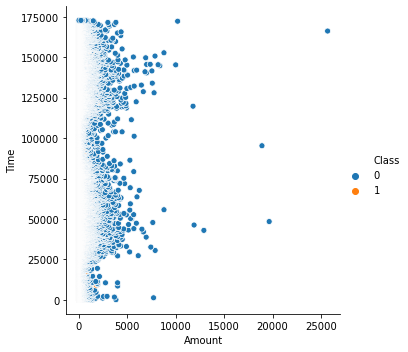

In [9]:
sns.relplot(x='Amount', y='Time',hue='Class', data=data)
plt.savefig("Outputs/Relational Plot.png")

# Stage 2: Data Preprocessing

_.iloc()_ method of python is used below to allocate all columns (except the last column, Class) of dataset to a new dataframe named X.\
And then column Class is allocated to the dataframe Y.

In [10]:
X = data.iloc[:,:-1]
Y = data['Class']

Now we are using train_test_split to split data in train set and test set.

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.35)

# Stage 3: Training Model

clf here represents classifier

In [12]:
clf = linear_model.LogisticRegression(C=1e5)

In [13]:
clf.fit(x_train, y_train)

c:\users\anil kumar soni\envs\venv_ml_1\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=100000.0)

# Stage 4: Making Predictions

**y_pred** - contains the predicted output based on test data.\
**Y** - contains the Original Outputs in test data.

In [14]:
y_pred = np.array(clf.predict(x_test))
Y = np.array(y_test)

In [15]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [16]:
print(confusion_matrix(Y, y_pred))

[[99484    37]
 [   62   100]]


In [17]:
print(accuracy_score(Y, y_pred))

0.9990068517199523


In [18]:
print(classification_report(Y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99521
           1       0.73      0.62      0.67       162

    accuracy                           1.00     99683
   macro avg       0.86      0.81      0.83     99683
weighted avg       1.00      1.00      1.00     99683

